In [1]:
from skimage import io, data
import matplotlib.pyplot as plt
import base64
import numpy as np
path='upload_fig/72e37a3c-0452-4081-9e1a-4fdd91f52d67.jpeg'
def image_show(image, nrows=1, ncols=1, cmap='gray'): 

    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 10))
    plt.axis('off')
    plt.imshow(image, cmap='gray',interpolation='nearest')
    return fig, ax

img=io.imread(path)

b64=str(base64.b64encode(img),'utf-8')
r = base64.b64decode(b64)


(<Figure size 1000x1000 with 1 Axes>, <AxesSubplot: >)

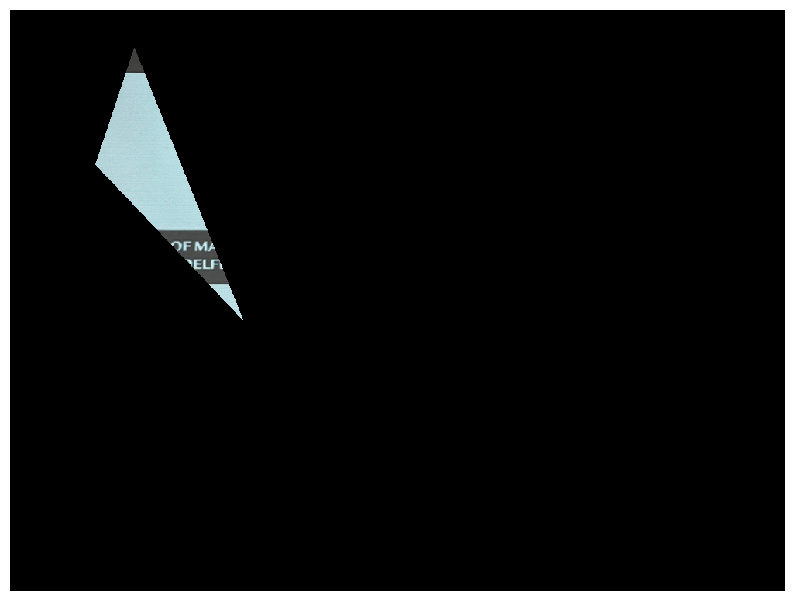

In [6]:
import cv2
from lib.Base64 import path_to_base64

def cut(img, pol):
    pol=np.array([pol], np.int32)
    #遮片
    mask=np.zeros(img.shape[:2], np.uint8)
    #多邊形填上白色
    cv2.polylines(mask, [pol], isClosed=True,color=(255,255,255), thickness=1)
    cv2.fillPoly(mask,pol,255)
    
    dst=cv2.bitwise_and(img, img, mask=mask)
    return dst


img=io.imread(path)
h, w, d = img.shape
img=cv2.resize(img, (1000, int(1000*h/w)), interpolation=cv2.INTER_AREA)
pol=np.array([[110,200],[300,400],[160,50]])
#pol= np.array([[200, 200], [300, 100], [300, 200], [200, 200], [200, 250]], np.int32)
img=cut(img,pol)
image_show(img)


In [7]:
out_path='output.jpg'
cv2.imwrite(out_path, img)
b64=path_to_base64(out_path)

In [11]:
img=base64.b64decode(b64)
filename='jjj.jpg'
with open(filename, "wb") as f:
        f.write(img)

In [10]:
img

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x02\x01\x01\x01\x01\x01\x02\x01\x01\x01\x02\x02\x02\x02\x02\x04\x03\x02\x02\x02\x02\x05\x04\x04\x03\x04\x06\x05\x06\x06\x06\x05\x06\x06\x06\x07\t\x08\x06\x07\t\x07\x06\x06\x08\x0b\x08\t\n\n\n\n\n\x06\x08\x0b\x0c\x0b\n\x0c\t\n\n\n\xff\xdb\x00C\x01\x02\x02\x02\x02\x02\x02\x05\x03\x03\x05\n\x07\x06\x07\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\xff\xc0\x00\x11\x08\x02\xee\x03\xe8\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\